# Shahar_Ariel_314868977

## Task 1)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Shaha\AppData\Local\Temp\ipykernel_6124\3184229241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

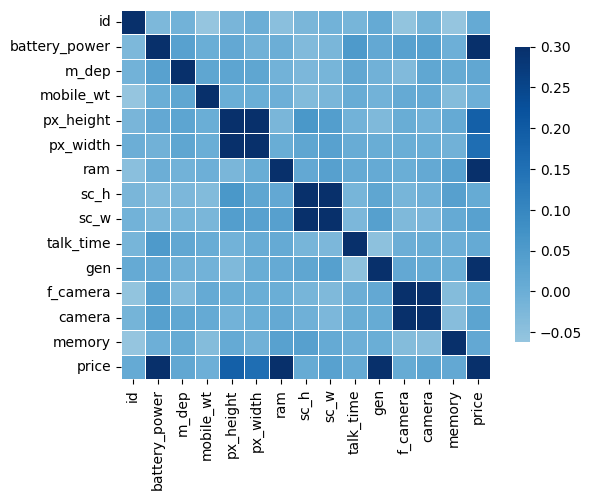

In [57]:
df = pd.read_csv('mobile_price_1.csv')
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap="Blues", vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

### ex 2)
the features that are best correlated with the price are:
1) battery power
2) screen resolution (px_height / px_width)
3) ram
4) core generation

### ex 3)
there are multiple features that are string that can have a strong correlation tact aren't shown like:
1) cores
2) speed
3) numer of sims
4) screen type
5) wifi
6) bluetooth

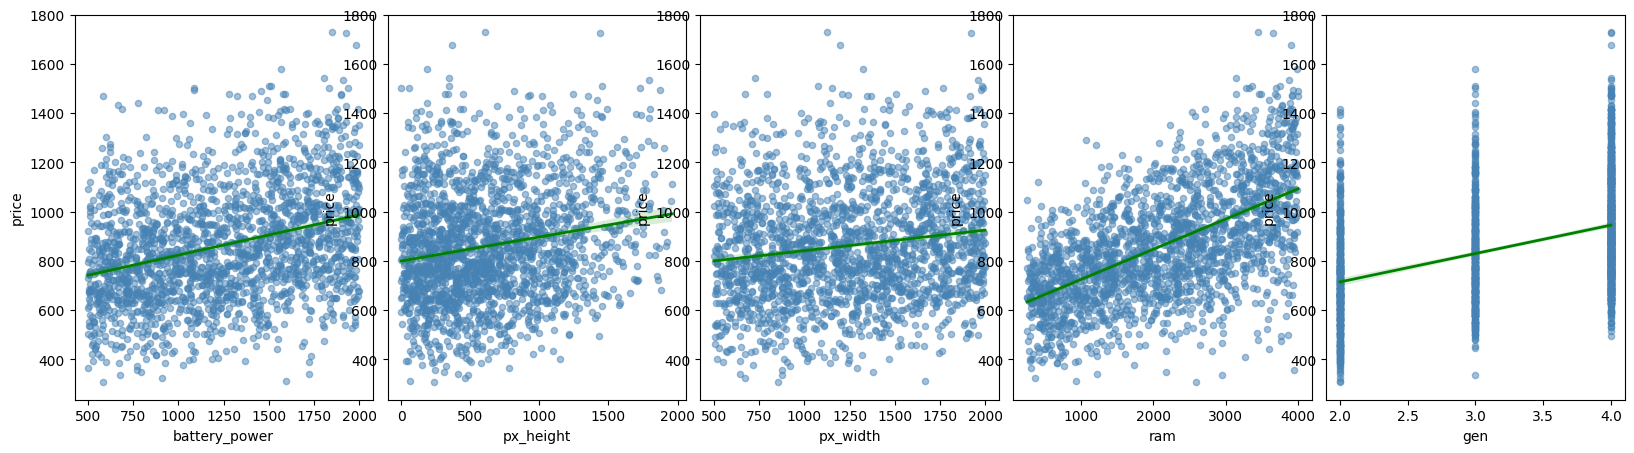

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
features = ['battery_power','px_height', 'px_width', 'ram', 'gen']
for ax, feature in zip(axes.flatten(), features):
    sns.regplot(data=df, x=feature, y='price', ax=ax,scatter_kws={'s':20, 'alpha':0.5, 'color':'SteelBlue'}, line_kws={'color':'green', 'lw':2})

plt.subplots_adjust(wspace=.05, hspace=0)
plt.show()

## task 2)

In [59]:
ordinal_features = ['gen', 'cores', 'speed']
nominal_features_hotones = ['bluetooth', 'wifi']
nominal_features_binary = ['sim', 'screen']

for feature in ordinal_features:
    df[feature + '_ord'] = pd.Categorical(df[feature],ordered=True)

print(df)

        id  battery_power  m_dep  mobile_wt  px_height  px_width   ram  sc_h  \
0        0            842    0.6        188         20       756  2549     9   
1        1           1021    0.7        136        905      1988  2631    17   
2        2            563    0.9        145       1263      1716  2603    11   
3        3            615    0.8        131       1216      1786  2769    16   
4        4           1821    0.6        141       1208      1212  1411     8   
...    ...            ...    ...        ...        ...       ...   ...   ...   
1995  1995            794    0.8        106       1222      1890   668    13   
1996  1996           1965    0.2        187        915      1965  2032    11   
1997  1997           1911    0.7        108        868      1632  3057     9   
1998  1998           1512    0.1        145        336       670   869    18   
1999  1999            510    0.9        168        483       754  3919    19   

      sc_w  talk_time  ...     sim  f_c

In [60]:
for feature in nominal_features_hotones:
    one_hot = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df, one_hot], axis=1)
df['sim_bin'] = df['sim'].apply(lambda x: 0 if x =='Single' else 1)
df['screen_bin'] = df['screen'].apply(lambda x: 0 if x =='LCD' else 1)
print(df)

        id  battery_power  m_dep  mobile_wt  px_height  px_width   ram  sc_h  \
0        0            842    0.6        188         20       756  2549     9   
1        1           1021    0.7        136        905      1988  2631    17   
2        2            563    0.9        145       1263      1716  2603    11   
3        3            615    0.8        131       1216      1786  2769    16   
4        4           1821    0.6        141       1208      1212  1411     8   
...    ...            ...    ...        ...        ...       ...   ...   ...   
1995  1995            794    0.8        106       1222      1890   668    13   
1996  1996           1965    0.2        187        915      1965  2032    11   
1997  1997           1911    0.7        108        868      1632  3057     9   
1998  1998           1512    0.1        145        336       670   869    18   
1999  1999            510    0.9        168        483       754  3919    19   

      sc_w  talk_time  ... speed_ord  b

C:\Users\Shaha\AppData\Local\Temp\ipykernel_6124\2795320292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

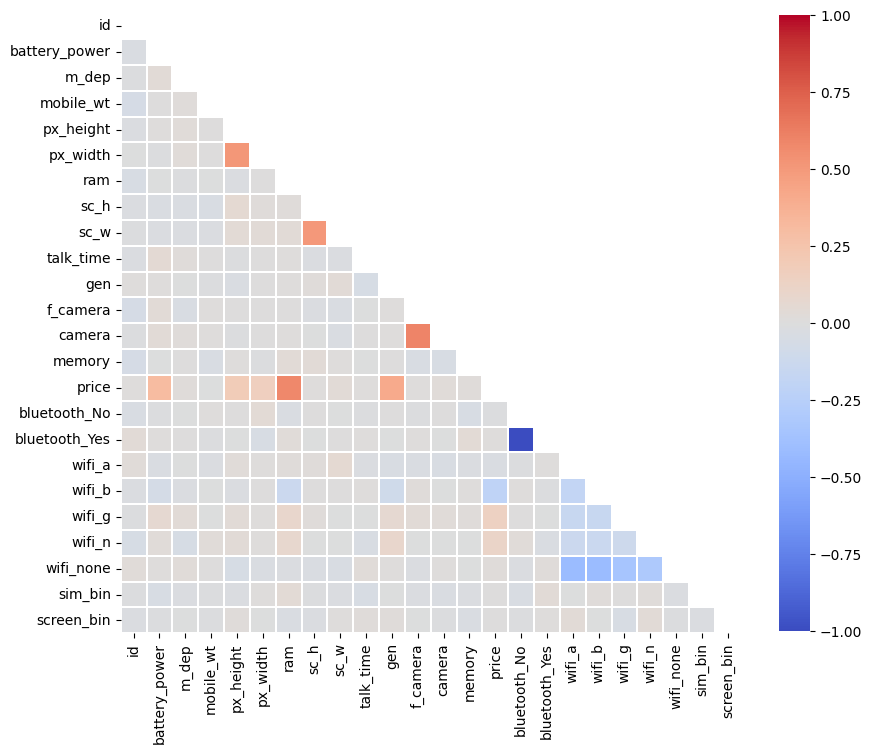

In [61]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.figure(figsize=(10, 10))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap="coolwarm",vmax=1 ,center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .8},mask=mask)

In [62]:
df.to_csv('mobile_prices_converted.csv', index=False)

## Task 3)

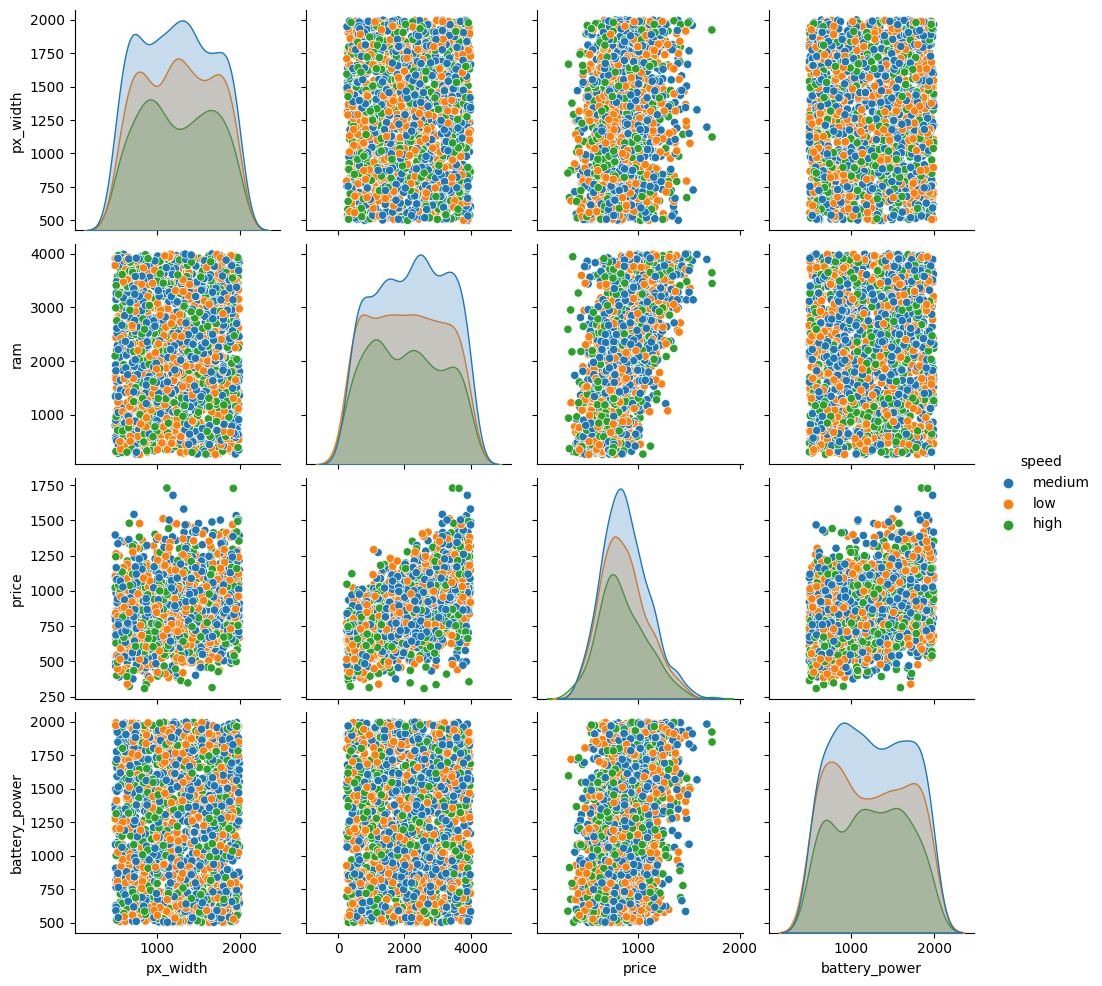

In [63]:
fdf = df[['px_width', 'ram', 'price' ,'battery_power','speed']]
sns.pairplot(fdf, hue='speed')

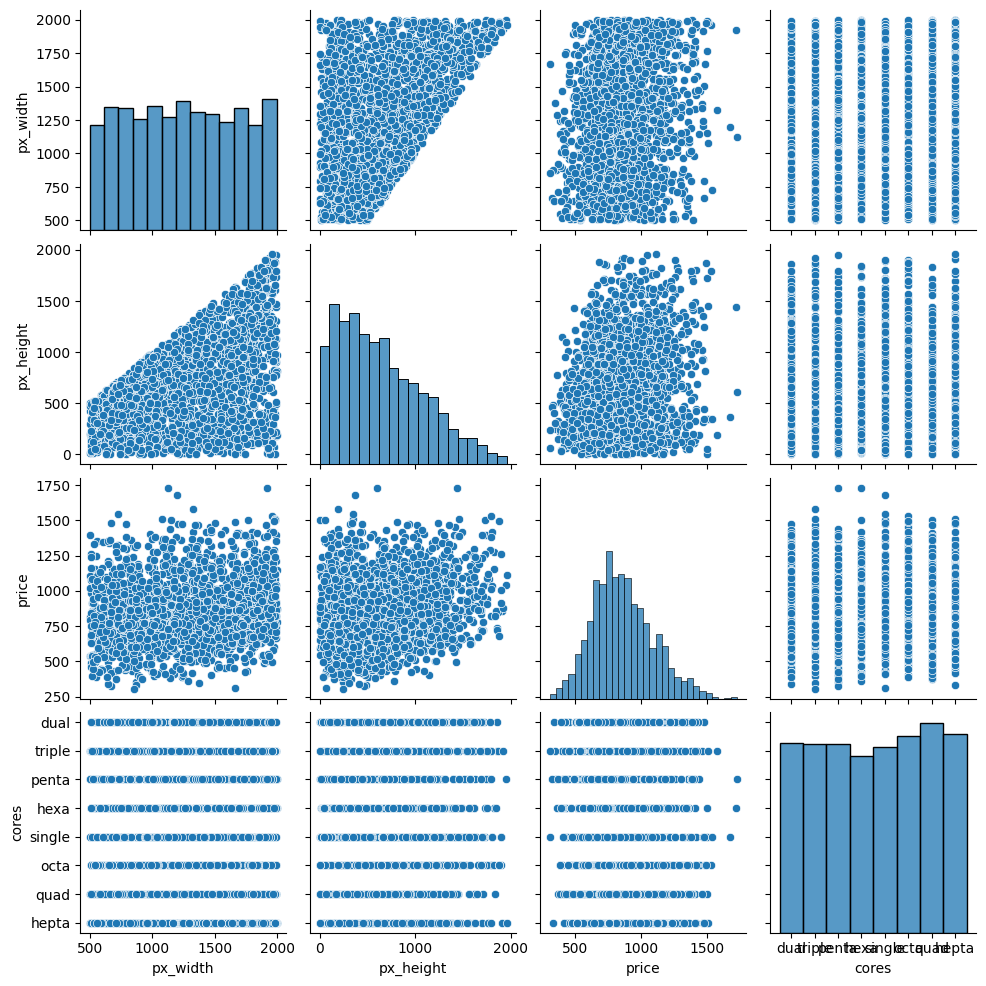

In [64]:
sns.pairplot(df, vars=["px_width", "px_height", "price", "cores"])

C:\Users\Shaha\AppData\Local\Temp\ipykernel_6124\1188253364.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

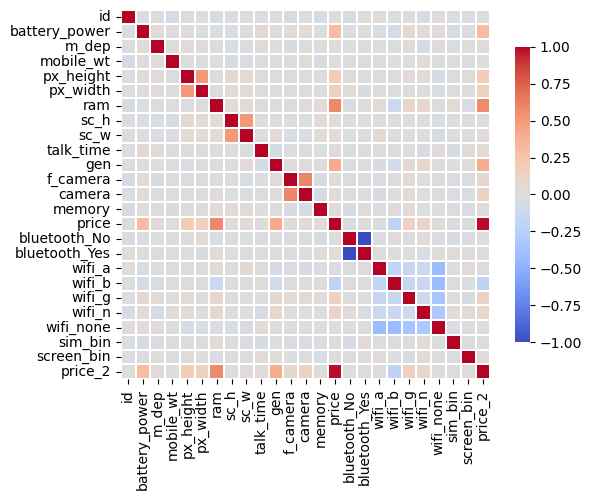

In [65]:
df2 = pd.read_csv('mobile_price_2.csv')
df['price_2'] = df2['price_2']
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap="coolwarm",vmax=1 ,center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .8})

[Index(['battery_power', 'bluetooth', 'bluetooth_No', 'bluetooth_Yes', 'camera',
       'cores', 'cores_ord', 'f_camera', 'gen', 'gen_ord', 'id', 'm_dep',
       'memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'screen', 'screen_bin', 'sim', 'sim_bin', 'speed', 'speed_ord',
       'talk_time', 'wifi', 'wifi_a', 'wifi_b', 'wifi_g', 'wifi_n',
       'wifi_none'],
      dtype='object')]


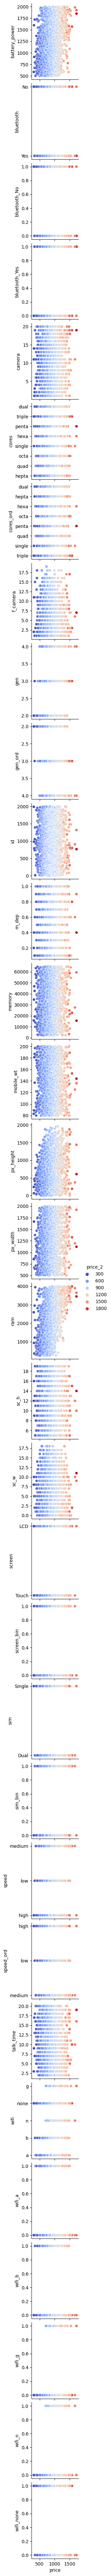

In [66]:
feats = [df.columns.difference(["price", "price_2"])]
print(feats)

sns.pairplot(df,hue='price_2',x_vars='price', y_vars=feats[0], palette='coolwarm')


In [67]:
corr = df.corr().price_2.abs()
corr.sort_values(kind="quicksort", ascending=False)


C:\Users\Shaha\AppData\Local\Temp\ipykernel_6124\885775373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().price_2.abs()


price_2          1.000000
price            0.979236
ram              0.572666
gen              0.398871
battery_power    0.305229
wifi_b           0.207161
px_height        0.180927
px_width         0.148964
wifi_g           0.144233
camera           0.134331
wifi_n           0.104177
f_camera         0.069039
sc_w             0.027421
wifi_a           0.020715
talk_time        0.019238
m_dep            0.016231
wifi_none        0.015068
id               0.009282
sc_h             0.009116
memory           0.008850
screen_bin       0.008086
mobile_wt        0.007688
bluetooth_Yes    0.006702
bluetooth_No     0.006702
sim_bin          0.001827
Name: price_2, dtype: float64

the most likely feature used to transform the price into price_2 is 'ram', we can see both in the pairplot that the ram is where when the Y goes up the Price 2 going up as well, and when we get the correlation from price 2 to the other features, we can see that price is almost identical but ram is the next most likely after we sort them